Usaremos o Pandas e o Matplotlib para esta visualização



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

Carregando os dados em um dataframe do pandas e selecionamos apenas alguns  países para a nossa lista. Isso torna nossa visualização mais facil no gráfico

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['Brazil', 'Germany', 'United Kingdom', 'US', 'Japan', 'China']
df = df[df['Country'].isin(countries)]

Criamos uma coluna de resumo que agrega o número total de casos entre nossos casos confirmados, casos recuperados e todos os indivíduos que morreram como resultado do COVID-19.



In [0]:
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

Preparando os quadros de dados para visualização de dados

Dinamizamos nosso quadro de dados df, criando colunas fora dos países, com o número de casos como os campos de dados. Esse novo quadro de dados é chamado covid. Em seguida, definimos o índice do quadro de dados como a data e atribuímos os nomes dos países aos cabeçalhos das colunas.

In [0]:
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries

Utilizamos um dicionário que está armazenando todas as populações de nossos países, dividimos cada valor pela população e multiplicamos por 100.000 para gerar um número de casos por 100.000 pessoas.

In [0]:
populations = {'Brazil':209664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'Japan': 51649883, 'China':1438027228}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000


Criamos um dicionário que contém valores hexadecimais para diferentes países. Armazenar isso em um dicionário nos permitirá chamá-lo facilmente mais tarde em um loop for. Também atribuímos o estilo FiveThirtyEight para adicionar alguma formatação geral, sobre a qual iremos basear-nos fortemente.

In [0]:
colors = {'Brazil':'#045275', 'China':'#089099', 'Japan':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

Criamos nossa primeira visualização usando a função de plotagem do Pandas. Usamos o parâmetro colors para atribuir as cores a diferentes colunas. Também usamos o set_major_formattermétodo para formatar valores com separadores para milhares.

Text(0, 0.5, '# of Cases')

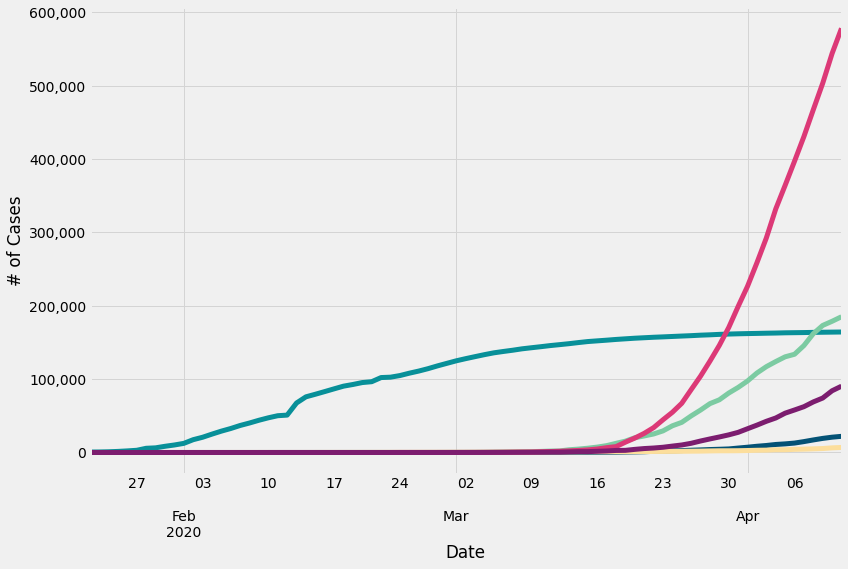

In [21]:
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

Criamos um loop for que gera texto de rótulo para os vários países. Esse loop for obtém o nome de cada país das chaves do dicionário na forma de uma lista e itera sobre essa lista. Ele coloca o texto que contém o nome do país à direita do último valor x ( covid.index[-1]→ a última data no quadro de dados), no valor y do dia atual (que sempre será igual ao valor máximo dessa coluna).

In [0]:
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')


Adicionamos um título, legenda e informações de origem sobre o gráfico. Usamos variáveis ​​novamente para posicionar os dados, de modo que, conforme o gráfico atualiza, essas posições são atualizadas dinamicamente!

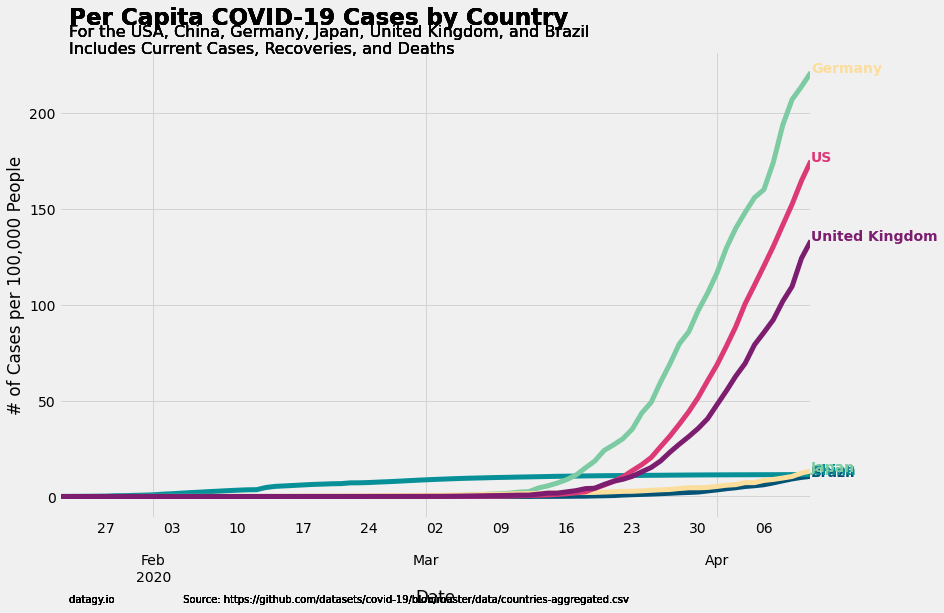

In [24]:
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')


for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
    percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+25, s = "Per Capita COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
    percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+10, s = "For the USA, China, Germany, Japan, United Kingdom, and Brazil\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
    percapitaplot.text(x = percapita.index[1], y = -55,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)